# Classifiy a hand-drawing apple - Raimondo Pastore


The purpose of the notebook is to classify if a hand-drawing is an apple or not.

The idea is to use 3 differente Classificator and understand how they perform:
 - Logistic Regression
 - Decision Tree
 - Gaussian Classifier
 
The trained models will be tested using 3 images downloaded from internet.

The training sets are taken from: https://quickdraw.withgoogle.com/data

The following notebook will downloand the resources for you in case are not present (https://gitlab.com/RaimondoPastore/ml_python_2020/-/tree/master/resources).


The reference repository: https://gitlab.com/RaimondoPastore/ml_python_2020

### Import Modules

In [21]:
from matplotlib import pyplot as plt

import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold
import cv2


### Import Datasets

Load ( or download in case are not present ) the Datasets and the Labels used for the training and validation


In [22]:
import os
import requests   

headers = {'User-Agent': 'Internet Exploiter 4'}

def donwload_file(url, filename):
    r = requests.get(url, allow_redirects=True, headers=headers)
    with open(filename, 'wb') as f:
        for chunk in r.iter_content(1024):
            f.write(chunk)


def load_file(filename, hook_load):

    if not os.path.exists(f"./{filename}"):
        url = f'https://gitlab.com/RaimondoPastore/ml_python_2020/-/raw/master/{filename}'
        
        print("Download file url -->", url)
        donwload_file(url, filename)
        print("File saved with name", filename)
    
    return hook_load(filename)

#Load of the datasets
apples = load_file("resources/full_numpy_bitmap_apple.npy", np.load)
ants = load_file("resources/full_numpy_bitmap_ant.npy", np.load)

moon = load_file("resources/full_numpy_bitmap_moon.npy", np.load)
pineapple = load_file("resources/full_numpy_bitmap_pineapple.npy", np.load)
mushroom = load_file("resources/full_numpy_bitmap_mushroom.npy", np.load)



N = int(len(apples)/20) #Let's use just a part of the datasets to not overfit the models

X_apple = apples[:N]

X_ants, X_moon, X_pineapple, X_mushroom  = ants[:int(N/4)], moon[:int(N/4)], pineapple[:int(N/4)], mushroom[:int(N/4)]


#LABEL FOR CLASSIFICATION

LABEL = {1: "APPLE", 0: "NOT APPLE"}

y_apple = np.ones(X_apple.shape[0])

y_ants = np.zeros(X_ants.shape[0])

y_moon = np.zeros(X_moon.shape[0])
y_pineapple = np.zeros(X_pineapple.shape[0])
y_mushroom = np.zeros(X_mushroom.shape[0])

X = np.concatenate((X_apple, X_ants, X_moon, X_pineapple, X_mushroom), axis=0)
y = np.concatenate((y_apple, y_ants, y_moon, y_pineapple,  y_mushroom), axis=0)

# X = np.concatenate((X_apple, X_ants), axis=0)
# y = np.concatenate((y_apple, y_ants), axis=0)

print("X shape", X.shape)
print("Y shape", y.shape)


X shape (14472, 784)
Y shape (14472,)


### Print some images

Print some images from the loaded datasets

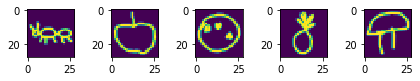

In [23]:
f, axes = plt.subplots(1, 5) 

f.tight_layout()

axes[0].imshow(ants[0].reshape(28,28))
axes[1].imshow((apples[54484].reshape(28,28)))
axes[2].imshow((moon[54].reshape(28,28)))
axes[3].imshow((pineapple[54484].reshape(28,28)))
axes[4].imshow((mushroom[54484].reshape(28,28)))

plt.show()

### Test Model

The following functions will be used to test the models with images download from internet (outside the datasets used for the training)

In [24]:
def hook_load_image(filename):
    return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

def rescale_img(filename):
    img = load_file(filename, hook_load_image)
    res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
    res = ~res #cv2.bitwise_not(res) 
    return img, res

def show_images(img, res):
    f, axes = plt.subplots(1, 2) 
    
    axes[0].imshow(img)
    axes[1].imshow(res)
    
    plt.show()


def test_model(model):
    
    img, res = rescale_img('resources/apple.jpg')
    show_images(img, res)
    prediction = model.predict(res.reshape(1,-1))[0]
    print("Prediction: ", LABEL[int(prediction)], "- Confidence:", model.predict_proba(res.reshape(1,-1)))

    img, res = rescale_img('resources/apple2.jpg')
    show_images(img, res)
    prediction = model.predict(res.reshape(1,-1))[0]
    print("Prediction: ", LABEL[int(prediction)], "- Confidence:", model.predict_proba(res.reshape(1,-1)))

    img, res = rescale_img('resources/moon.jpg')
    show_images(img, res)
    prediction = model.predict(res.reshape(1,-1))[0]
    print("Prediction: ", LABEL[int(prediction)], "- Confidence:", model.predict_proba(res.reshape(1,-1)))

### Cross Validation

For the validation of the models, it will be used the K-fold Cross Validation. It will be selected the model  with the smallest validation error. It will printed the Confusion Matrix for the best model.

In [25]:
#Kfold Cross Validation

def k_fold_validation_model(k, model, X, y):
    
    kf = KFold(n_splits=k, shuffle=True) #I had to shuffle because of a bug in LogisticRegression / Lasso classes

    errors_valid = []
    
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        fitted_model = model.fit(X_train, y_train)
        y_pred = fitted_model.predict(X_test)
        
        errors_valid.append(metrics.mean_squared_error(y_test, y_pred))
               
    return np.average(errors_valid)

K_FOLD = 5


In [26]:
def fit_model(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    fitted_model = model.fit(X_train, y_train)
    
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, fitted_model.predict(X_test)))
    
    return fitted_model

### Test Logistic Regression

Validation error 0.06972037912994905
Confusion Matrix:
[[2026  152]
 [ 146 2018]]


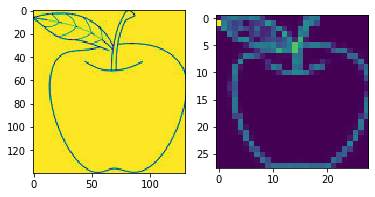

Prediction:  NOT APPLE - Confidence: [[0.63398455 0.36601545]]


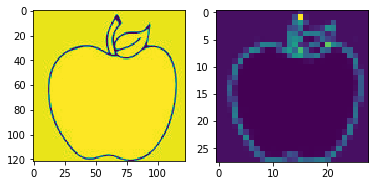

Prediction:  NOT APPLE - Confidence: [[0.77085628 0.22914372]]


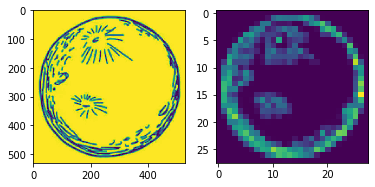

Prediction:  NOT APPLE - Confidence: [[0.52902356 0.47097644]]


In [27]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='saga', tol=0.01) #use a higher tollerance in order to let comverge the training

print("Validation error", k_fold_validation_model(K_FOLD, logistic, X, y))

fitted_model = fit_model(logistic, X, y)

test_model(fitted_model)


### Decision Tree Classifier

Validation error 0.09376672360061254
Confusion Matrix:
[[1958  220]
 [ 233 1931]]


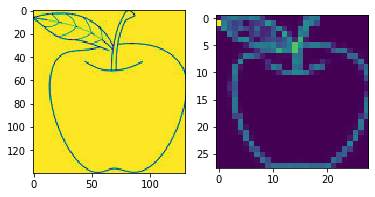

Prediction:  APPLE - Confidence: [[0. 1.]]


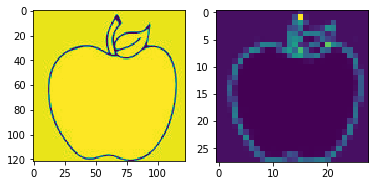

Prediction:  APPLE - Confidence: [[0. 1.]]


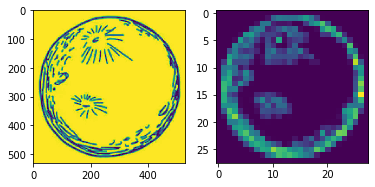

Prediction:  NOT APPLE - Confidence: [[1. 0.]]


In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, criterion='entropy')

print("Validation error", k_fold_validation_model(K_FOLD, clf, X, y))

clf_fitted_model = fit_model(clf, X, y)

test_model(clf_fitted_model)


### Gaussian Classifier

Validation error 0.10074541693671499
Confusion Matrix:
[[1960  218]
 [ 231 1933]]


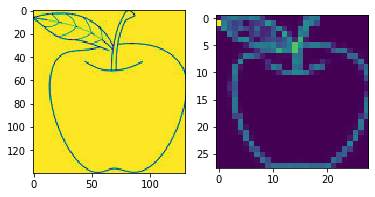

Prediction:  NOT APPLE - Confidence: [[1. 0.]]


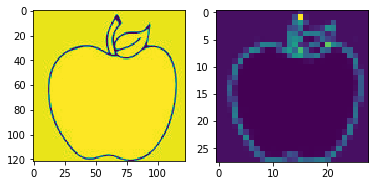

Prediction:  NOT APPLE - Confidence: [[1. 0.]]


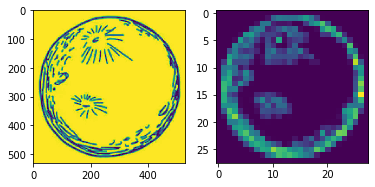

Prediction:  APPLE - Confidence: [[9.87011228e-41 1.00000000e+00]]


In [29]:
from sklearn.naive_bayes import GaussianNB

print("Validation error", k_fold_validation_model(K_FOLD, GaussianNB(), X, y))

fitted_model = fit_model(GaussianNB(), X, y)

test_model(fitted_model)


### Final thoughts 


The Decision Tree seems to have the best prediction accurancy and the Gaussian Classifier the worst performance.

Th Imporvement;
- I'm afraid the the model are overfitted or perferming badly on other cases. This would require more investigation
- Test other classificators performance
- Using Dimensionality Reduction


Looking for advises on how to improve the notebook.


### Persist the model

Persist the model in order to reuse it. In the case let's persist the Decision tree that seems to be the best one.

In [30]:
from joblib import dump

dump(clf_fitted_model, 'model.sav') 

['model.sav']